In [184]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [185]:
from google.colab import files
uploaded = files.upload()

Saving leaf-spot-disease.jpg to leaf-spot-disease (7).jpg


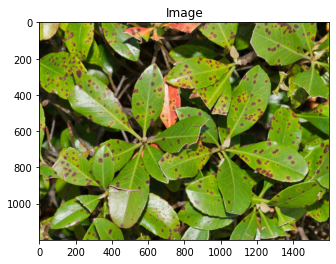

In [243]:
image = cv2.imread('leaf-spot-disease.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title("Image")
plt.imshow(image_rgb)
plt.show()

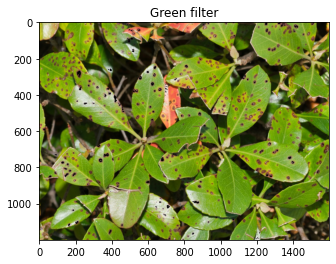

In [244]:
#apply the green mask
hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, (0, 0, 0), (87, 255,255))
imask = mask>0
green = np.zeros_like(image_rgb, np.uint8)
green[imask] = image_rgb[imask]

plt.title("Green filter")
plt.imshow(green)
plt.show()

In [245]:
np.shape(image)

(1200, 1600, 3)

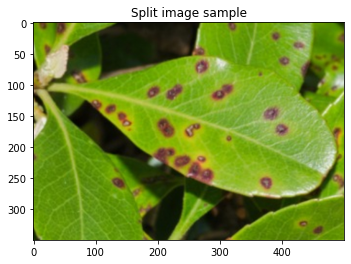

In [246]:
SplitImage1 = image_rgb[600:950, 1000:1500]
plt.title("Split image sample")
plt.imshow(SplitImage1)
plt.show()

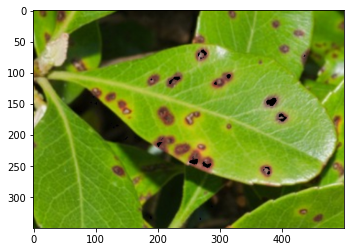

In [247]:
SplitImage = green[600:950, 1000:1500]
plt.imshow(SplitImage)
plt.show()

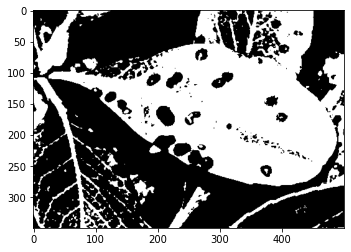

In [248]:
gray = cv2.cvtColor(SplitImage, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,110, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')
plt.show()



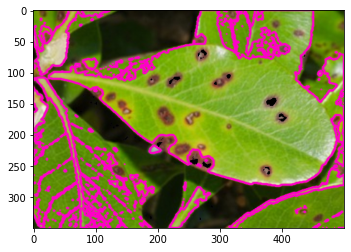

In [249]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
3
                                      
4
# draw contours on the image
5
image_copy = SplitImage.copy()
6
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 0, 200), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(image_copy, cmap='gray')
plt.show()


In [250]:
sorted_contours = sorted(contours, key = cv2.contourArea, reverse = True)

In [251]:
largestContour = [sorted_contours[0]]

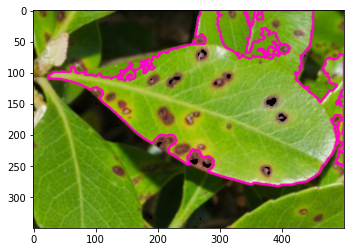

In [252]:
image_copy = SplitImage.copy()
6
cv2.drawContours(image=image_copy, contours= largestContour, contourIdx=-1, color=(255, 0, 200), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(image_copy, cmap='gray')
plt.show()

In [253]:
mask = np.zeros(image_copy.shape, np.uint8)
mask.fill(255)
if largestContour != 1:
  #cv2.fillConvexPoly(mask, largestContour[contour], (0, 0, 0))
  cv2.fillPoly(mask, largestContour, (0, 0, 0))

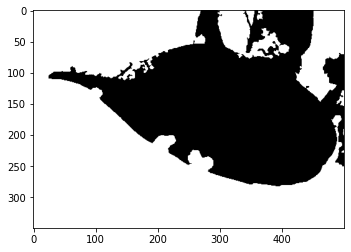

In [254]:
plt.imshow(mask, cmap='gray')
plt.show()

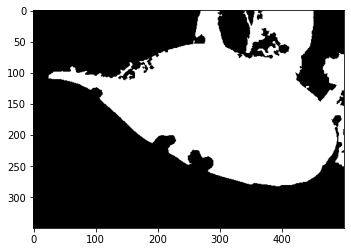

In [255]:
mask1 = cv2.bitwise_not(mask)
plt.imshow(mask1, cmap='gray')
plt.show()

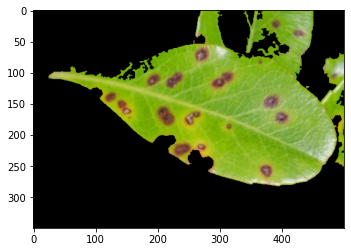

In [256]:
result = cv2.bitwise_and(mask1, SplitImage1)
plt.imshow(result)
plt.show()

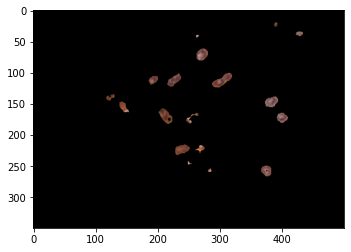

In [257]:
hsv2 = cv2.cvtColor(result, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv2, (107, 0, 0), (179, 255, 255))
bmask = mask>0
brown = np.zeros(result.shape, np.uint8)
brown[bmask] = result[bmask]

plt.imshow(brown)
plt.show()


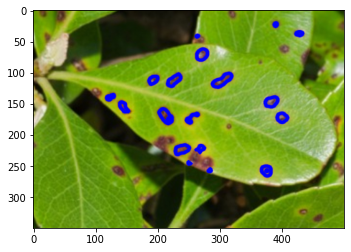

In [258]:
gray = cv2.cvtColor(brown, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY)

contours1, hierarchy = cv2.findContours(image=thresh1, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)


result = cv2.drawContours(image=SplitImage1, contours=contours1, contourIdx=-1, color=(0, 0, 255), thickness=4, lineType=cv2.LINE_AA)
plt.imshow(result)
plt.show()